In [1]:
import numpy as np
from datetime import datetime
import tensorflow as tf
import os

from tensorflow.python.platform import app
from tensorflow.python.platform import flags



# How often to record tensorboard summaries.
SUMMARY_INTERVAL = 40

# How often to run a batch through the validation model.
VAL_INTERVAL = 200

# How often to save a model checkpoint
SAVE_INTERVAL = 400

# tf record data location:
DATA_DIR = '/home/xca64/vml4/dataset/ucf101/ucf101_imgs'

# local output directory
OUT_DIR = '/cs/vml4/xca64/robot_data/result'

# summary output dir
SUM_DIR = '/cs/vml4/xca64/robot_data/summaries'

FLAGS = flags.FLAGS

flags.DEFINE_string('data_dir', DATA_DIR, 'directory containing data.')
flags.DEFINE_string('dataset_name', 'ucf', 'dataset used')
flags.DEFINE_string('output_dir', OUT_DIR, 'directory for model checkpoints.')
flags.DEFINE_string('gif_dir', '/cs/vml4/xca64/robot_data/gif/' , 'directory gif result')
flags.DEFINE_integer('gif_nums', 5 , 'number of gif files to save')
flags.DEFINE_string('event_log_dir',SUM_DIR, 'directory for writing summary.')
flags.DEFINE_integer('num_iterations', 100000, 'number of training iterations.')
flags.DEFINE_string('pretrained_model', '' ,
                    'filepath of a pretrained model to initialize from.')

flags.DEFINE_integer('sequence_length', 10,
                     'sequence length, including context frames.')
flags.DEFINE_integer('context_frames', 2, '# of frames before predictions.')
flags.DEFINE_integer('use_state', 1,
                     'Whether or not to give the state+action to the model')

flags.DEFINE_string('model', 'prednet',
                    'model architecture to use - prediction, prednet')

flags.DEFINE_integer('num_masks', 10,
                     'number of masks, usually 1 for DNA, 10 for CDNA, STN.')
flags.DEFINE_float('schedsamp_k', 900.0,
                   'The k hyperparameter for scheduled sampling,'
                   '-1 for no scheduled sampling.')
flags.DEFINE_float('train_val_split', 0.95,
                   'The percentage of files to use for the training set,'
                   ' vs. the validation set.')

flags.DEFINE_float('gpu_memory_fraction', 1.0,
                   'gpu percentage')

flags.DEFINE_integer('batch_size', 32, 'batch size for training')
flags.DEFINE_float('learning_rate', 0.001,
                   'the base learning rate of the generator')

In [2]:
import sys
sys.path.append('/home/xca64/vml4/github/video_prediction/data')

In [3]:
from ucf101_img_input import build_tfrecord_input
from ucf101_img_input import get_image_paths_and_labels

In [ ]:
%load_ext autoreload
%autoreload 2

In [4]:
images, labels = build_tfrecord_input()

In [5]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
coord = tf.train.Coordinator()
tf.train.start_queue_runners(coord=coord, sess=sess)

[<Thread(Thread-4, started daemon 140585134446336)>,
 <Thread(Thread-5, started daemon 140585126053632)>,
 <Thread(Thread-6, started daemon 140585117660928)>,
 <Thread(Thread-7, started daemon 140585109268224)>,
 <Thread(Thread-8, started daemon 140584882796288)>,
 <Thread(Thread-9, started daemon 140584874403584)>,
 <Thread(Thread-10, started daemon 140584866010880)>,
 <Thread(Thread-11, started daemon 140584857618176)>,
 <Thread(Thread-12, started daemon 140584849225472)>,
 <Thread(Thread-13, started daemon 140584840832768)>,
 <Thread(Thread-14, started daemon 140584832440064)>,
 <Thread(Thread-15, started daemon 140583809054464)>,
 <Thread(Thread-16, started daemon 140583800661760)>,
 <Thread(Thread-17, started daemon 140583792269056)>,
 <Thread(Thread-18, started daemon 140583783876352)>,
 <Thread(Thread-19, started daemon 140583775483648)>,
 <Thread(Thread-20, started daemon 140583767090944)>,
 <Thread(Thread-21, started daemon 140583758698240)>,
 <Thread(Thread-22, started daemon

In [6]:
imgs= sess.run(images)

In [ ]:
np.shape(imgs)

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

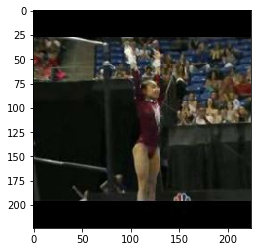

In [37]:
imgs = sess.run([images]) 
np.shape(imgs)
imgs[0]
# print(name)
imgplot = plt.imshow(imgs[0][0])


In [ ]:
fileseq, labelsseq = get_image_paths_and_labels(list_dir, training=True)

In [ ]:
input_queue = tf.train.input_producer(np.asarray(np.transpose([fileseq, labelsseq], (1,2,0))), shuffle=True)

In [ ]:
tmp = input_queue.dequeue()

In [ ]:
sess.run(tmp)

In [ ]:
images_and_labels = []
fileinfo = input_queue.dequeue()

indx = random.randint(0,NROF_SAMPLES)
filename = fileinfo[indx,0]
label = fileinfo[indx,1]



In [ ]:
sess.run(label)

In [ ]:
file_contents = tf.read_file(filename)
image = tf.image.decode_jpeg(file_contents)

crop_size = min(ORIGINAL_HEIGHT, ORIGINAL_WIDTH)
image = tf.image.resize_image_with_crop_or_pad(image, crop_size, crop_size)
image = tf.reshape(image, [1, crop_size, crop_size, 3])
image = tf.image.resize_bilinear(image, [IMG_HEIGHT, IMG_WIDTH])
image = tf.cast(image, tf.float32) / 255.0
#pylint: disable=no-member
image = tf.reshape(image, [IMG_HEIGHT, IMG_WIDTH, 3])
image.set_shape((IMG_HEIGHT, IMG_WIDTH, 3))

In [ ]:
image

In [ ]:
sess.run(label)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
# Enter an interactive TensorFlow Session.
import tensorflow as tf
sess = tf.InteractiveSession()

x = tf.Variable([1.0, 2.0])
a = tf.constant([3.0, 3.0])

# Initialize 'x' using the run() method of its initializer op.
x.initializer.run()

# Add an op to subtract 'a' from 'x'.  Run it and print the result
print(x.eval())
# ==> [-2. -1.]

# Close the Session when we're done.
sess.close()
